In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [2]:
# Total confirmed cases
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_confirmed.rename(columns = {'Province/State':'State', 'Country/Region': 'Country'}, inplace = True)
df_confirmed.drop(columns = ['State'], inplace = True)
df_confirmed.head()

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155


In [3]:
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths = df_deaths.rename(columns={"Province/State":"State","Country/Region": "Country"})
df_deaths.drop(columns = ['State'], inplace = True)
df_deaths.head()

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7


In [4]:
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv").fillna(0)
df_covid19.rename(columns = {'Country_Region':'Country', 'Long_':'Long'}, inplace = True)
df_covid19.drop(columns = ['UID', 'ISO3'], inplace = True)
df_covid19.head()

,Country,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate
0,Australia,2020-06-18 13:33:29,-25.0000,133.0000,7391.0,102.0,6877.0,412.0,29.030193,0.0,0.0,1.380057
1,Austria,2020-06-18 13:33:29,47.5162,14.5501,17223.0,688.0,16101.0,434.0,191.230680,0.0,0.0,3.994658
2,Canada,2020-06-18 13:33:29,60.0010,-95.0010,101492.0,8312.0,63280.0,29901.0,268.102280,0.0,0.0,8.189808
3,China,2020-06-18 13:33:29,30.5928,114.3055,84462.0,4638.0,79511.0,313.0,6.012915,0.0,0.0,5.491227
4,Denmark,2020-06-18 13:33:29,56.2639,9.5018,12534.0,600.0,11442.0,492.0,216.394349,0.0,0.0,4.786979


In [5]:
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])
df_table.rename(columns = {'Country_Region':'Country'}, inplace = True)
df_table.drop(columns = ['UID', 'iso3'], inplace = True)
df_table.head()

,Country,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered,Incident_Rate,People_Tested,People_Hospitalized,Province_State,FIPS,Report_Date_String
0,Afghanistan,2020-01-22,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020/01/22
1,Afghanistan,2020-01-23,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020/01/23
2,Afghanistan,2020-01-24,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020/01/24
3,Afghanistan,2020-01-25,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020/01/25
4,Afghanistan,2020-01-26,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020/01/26


###  Worldwide COVID-19 reported

In [6]:
temp = pd.DataFrame(df_covid19.loc[:,['Confirmed', 'Active', 'Deaths', 'Recovered']].sum(axis = 'index')).T
temp['Mortality rate per 100'] = np.round((100*temp['Deaths'])/temp['Confirmed'], 2)
temp.style.background_gradient(cmap = 'Wistia', axis = 'columns').format('{:.2f}').format('{:.0f}',
                                                                    subset = ['Confirmed', 'Active', 'Deaths', 'Recovered'])

,Confirmed,Active,Deaths,Recovered,Mortality rate per 100
0,8383277,3759581,449628,4101877,5.36


In [7]:
del(temp)

### Country Wise Reported Cases

In [8]:
(df_covid19.loc[:,['Country', 'Confirmed', 'Active', 'Recovered', 'Deaths', 'Incident_Rate', 'Mortality_Rate']].
set_index('Country').
sort_values(by = 'Confirmed', ascending = False).
style.background_gradient(cmap = 'Reds', subset=["Confirmed"]).
background_gradient(cmap = 'Oranges', subset = ['Deaths']).
background_gradient(cmap = 'Greens', subset = ['Recovered']).
background_gradient(cmap = 'OrRd', subset = ['Active']).
background_gradient(cmap = 'YlOrRd', subset = ['Mortality_Rate']).
background_gradient(cmap = 'Purples', subset = ['Incident_Rate'])).format('{:.2f}').format('{:.0f}',
                                                            subset = ['Confirmed', 'Active', 'Recovered', 'Deaths'])

,Confirmed,Active,Recovered,Deaths,Incident_Rate,Mortality_Rate
Country,,,,,,
US,2164071,1381960,592191,117728,656.84,5.44
Brazil,955377,387821,521046,46510,449.46,4.87
Russia,560279,239254,313387,7638,383.93,1.36
India,366946,160384,194325,12237,26.59,3.33
United Kingdom,300717,257175,1304,42238,442.97,14.05
Spain,244683,67171,150376,27136,523.33,11.09
Peru,240908,105029,128622,7257,730.65,3.01
Italy,237828,23925,179455,34448,393.35,14.48
Chile,220628,35082,181931,3615,1154.14,1.64


### Top 10 countries with the most affected cases

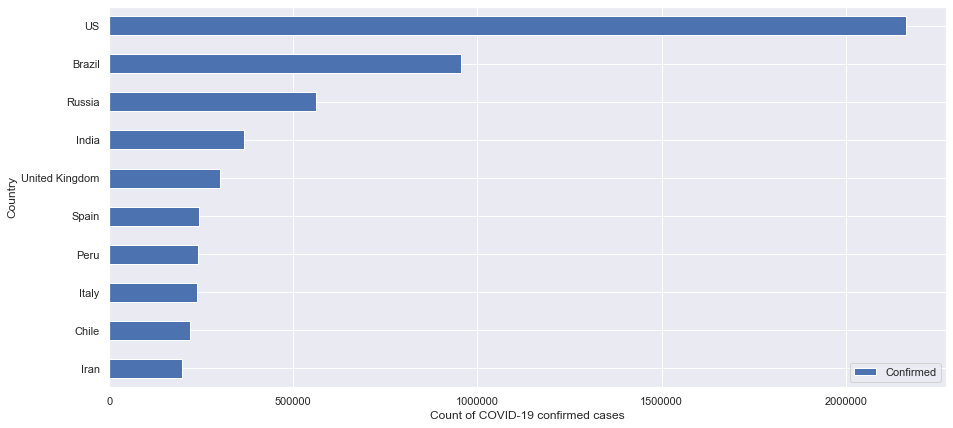

In [9]:
s = df_covid19.loc[:,['Country', 'Confirmed']].set_index('Country').sort_values(by = 'Confirmed', ascending = False)
s[:10].sort_values(by = 'Confirmed').plot(kind = 'barh', figsize = (15,7));
plt.xlabel('Count of COVID-19 confirmed cases');

### Top 10 countries with the most deaths

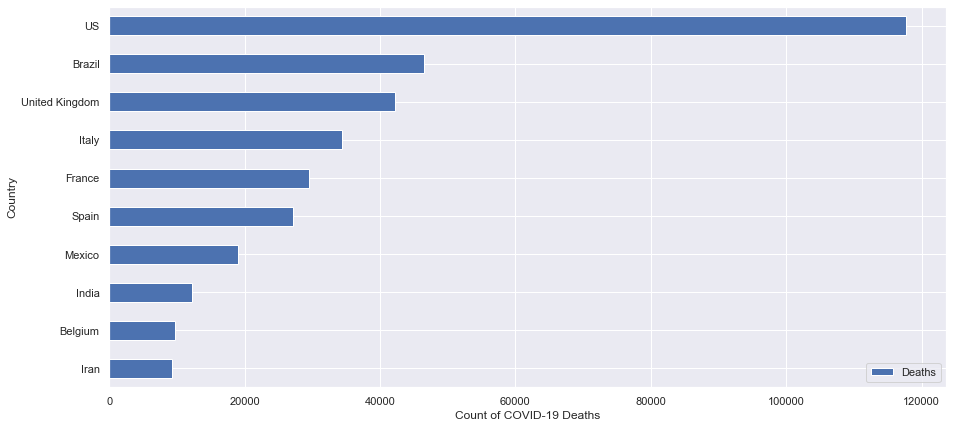

In [10]:
s = df_covid19.loc[:,['Country', 'Deaths']].set_index('Country').sort_values(by = 'Deaths', ascending = False)
s[:10].sort_values(by = 'Deaths').plot(kind = 'barh', figsize = (15,7));
plt.xlabel('Count of COVID-19 Deaths');

### Top 10 countries with the most active cases

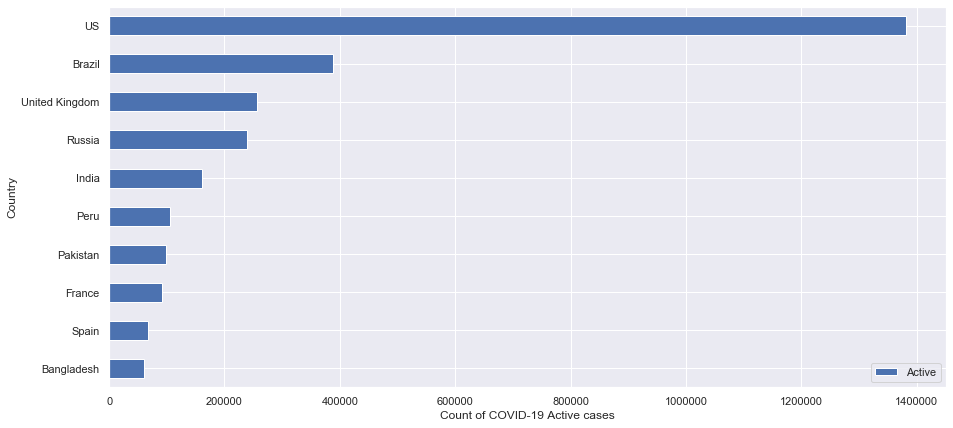

In [11]:
s = df_covid19.loc[:,['Country', 'Active']].set_index('Country').sort_values(by = 'Active', ascending = False)
s[:10].sort_values(by = 'Active').plot(kind = 'barh', figsize = (15,7));
plt.xlabel('Count of COVID-19 Active cases');

### Top 10 countries with the most recovered cases

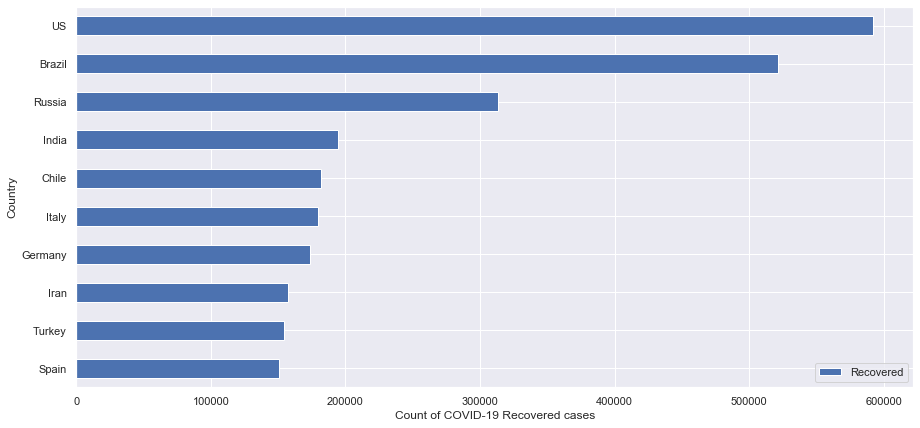

In [12]:
s = df_covid19.loc[:,['Country', 'Recovered']].set_index('Country').sort_values(by = 'Recovered', ascending = False)
s[:10].sort_values(by = 'Recovered').plot(kind = 'barh', figsize = (15,7));
plt.xlabel('Count of COVID-19 Recovered cases');

In [13]:
import plotly.express as px